# Procedure for an Unknown Variance

<ul>
    <li>State the null and alternative hypotheses.</li>
    <font size = "4">
        $$H_0: \mu = \mu_0$$<br>
        $$H_1: \mu \ne \mu_0$$
    </font><br>
    <li>Specify a significance level $\alpha$. A commonly-used value is $\alpha=0.05$.</li>
    <li>Draw a sample of size $n$.</li>
    <li>Calculate the sample mean $\overline{x}.$</li>
    <li>Calculate the sample standard deviation $s$ with $n - 1$ degrees of freedom.</li>
    <li>Since the population standard deviation $\sigma$ is unknown, we need to use the $T$ statistic. Recall that if we keep drawing samples from the population and calculating different values of $T$, we will find that the probability distribution of $T$ follows Student's t distribution.</li><br>
    <font size="4">
        $$T=\frac{\overline{X}-\mu_0}{\frac{s_x}{\sqrt{n}}}$$
    </font><br>
</ul>

<ul>
    <li>Using the $t$ distribution, calculate values of $T$ that define the acceptance and rejection regions:</li>
    <ul>
        <li>If the hypothesis test is two-sided, using $n - 1$ degrees of freedom, calculate $t_{lo}$ and $t_{hi}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            t_{lo} &= \mathrm{ppf}\left( \frac{\alpha}{2} \right); P(T \le t_{lo}) = \frac{\alpha}{2}\\\\
            t_{hi} &= \mathrm{ppf}\left( 1 - \frac{\alpha}{2} \right); P(T \ge t_{hi}) = \frac{\alpha}{2}
            \end{align}
        </font><br>
        <li>If the hypothesis test is one-sided and lower-bound, using $n - 1$ degrees of freedom, calculate $t_{lo}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            t_{lo} &= \mathrm{ppf}\left( \alpha \right); P(T \le t_{lo}) = \alpha
            \end{align}
        </font><br>
        <li>If the hypothesis test is one-sided and upper-bound, using $n - 1$ degrees of freedom, calculate $t_{hi}$ such that:</li><br>
        <font size = "4">
            \begin{align}
            t_{hi} &= \mathrm{ppf}\left( 1 - \alpha \right); P(T \ge t_{hi}) = \alpha
            \end{align}
        </font><br>
    </ul>
</ul>

<ul>
    <li>Using the null value $\mu_0$, $t_{lo}$, and $t_{hi}$, calculate the critical values $x_{lo}$ and $x_{hi}$.</li><br>
    <font size = "4">
        \begin{align}
        x_{lo} &= \mu_0 + t_{lo} \frac{s_x}{\sqrt{n}}\\\\
        x_{hi} &= \mu_0 + t_{hi} \frac{s_x}{\sqrt{n}} 
        \end{align}
    </font><br>
    <li>The critical values define the acceptance and rejection regions. Evaluate whether the sample mean $\overline{x}$ is in the acceptance or rejection region. Accept or reject the null hypothesis appropriately.</li>
</ul>

# In Practice

In [31]:
import numpy as np
import plots
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import hypothesis_testing as ht
from statsmodels.stats.weightstats import DescrStatsW

In [2]:
figsize=(4*1.6, 4)

0.8


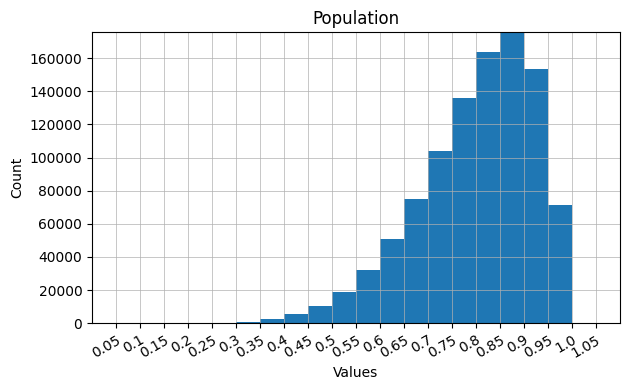

In [20]:
N = int(1e6)
population = np.random.beta(a=8, b=2, size=N)
df_pop = pd.DataFrame(data=population, columns=["value"])
mu = np.mean(population)
sigma = np.std(population)
print(round(mu, 2))

bins = np.arange(0.05, 1.1, 0.05)
_, _ = plots.histogram(df=df_pop, bins=bins, figsize=figsize, title="Population", xlabel=["Values"], ylabel=["Count"])

In [4]:
# Draw a sample
n = 30
x = np.random.choice(population, size=n)
x_bar = np.mean(x)
s_x = np.std(x, ddof=1)
print(round(x_bar, 2))
print(round(s_x, 2))

0.79
0.12


## Two-sided Test

In [5]:
# H0: mu = 0.76
# H1: mu != 0.76
mu_0 = 0.76
alpha = 0.05 # significance level

In [6]:
# Compute the t statistic
t = (x_bar - mu_0)/(s_x / math.sqrt(n))

In [10]:
# Define the acceptance region, the region where the null hypothesis will not be rejected
t_lo = stats.t.ppf(alpha / 2, df=n - 1)
t_hi = stats.t.ppf(1 - (alpha / 2), df=n - 1)
x_lo = mu_0 + (t_lo * (sigma / math.sqrt(n)))
x_hi = mu_0 + (t_hi * (sigma / math.sqrt(n)))

In [13]:
# Check if the value is in the acceptance region
if x_bar >= x_lo and x_bar <= x_hi:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu != {mu_0}, with {1 - alpha} confidence level")

Fail to reject null hypothesis.
mu = 0.76, with 0.95 confidence level


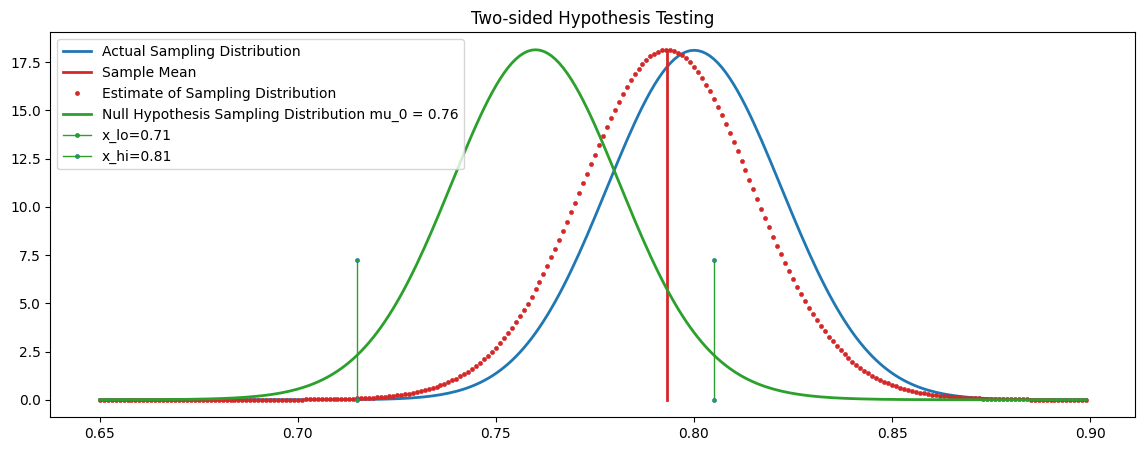

In [21]:
# Visualize the sampling distribution
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 1, 1)
samp_dist_x = np.arange(0.65, 0.9, 0.001)
samp_dist_pdf = stats.norm.pdf(samp_dist_x, loc=mu, scale=sigma/math.sqrt(n))
plots.scatter(x=samp_dist_x, y=samp_dist_pdf, fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.BLUE)

# Visualize the sample in relation to the sampling distribution
plots.scatter(x=np.array([x_bar, x_bar]), y=np.array([0,max(samp_dist_pdf)]),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.RED)

# Visualize the estimated sampling distribution based on the sample mean
plots.scatter(x=samp_dist_x, y=stats.t.pdf(samp_dist_x, loc=x_bar, scale=s_x/math.sqrt(n), df=n - 1),
              fig=fig, ax=ax, markersize=3, color=plots.RED, markeredgecolor=plots.RED)

# Visualize the sampling distribution asserted by the null hypothesis
plots.scatter(x=samp_dist_x, y=stats.t.pdf(samp_dist_x, loc=mu_0, scale=s_x/math.sqrt(n), df=n - 1),
              fig=fig, ax=ax, markersize=0, linewidth=2, color=plots.GREEN)
plots.scatter(x=np.array([x_lo, x_lo]), y=np.array([0, max(samp_dist_pdf) * 0.4]),
              fig=fig, ax=ax, marker="o", markersize=3, linewidth=1, color=plots.GREEN)
plots.scatter(x=np.array([x_hi, x_hi]), y=np.array([0, max(samp_dist_pdf) * 0.4]),
              fig=fig, ax=ax, marker="o", markersize=3, linewidth=1, color=plots.GREEN)
ax.set_title("Two-sided Hypothesis Testing")

# Add legend to plot
ax.legend(["Actual Sampling Distribution",
           "Sample Mean",
           "Estimate of Sampling Distribution",
           f"Null Hypothesis Sampling Distribution mu_0 = {mu_0}",
           f"x_lo={round(x_lo, 2)}",
           f"x_hi={round(x_hi, 2)}"])

In [23]:
# Using the p-value
pvalue = ht.twoTailPvalue(n=n, mu0=mu_0, sampmean=x_bar, sampstd=s_x)
print(pvalue)
if pvalue >= alpha:
    print(f"Fail to reject null hypothesis.")
    print(f"mu = {mu_0}, with {1 - alpha} confidence level")
else:
    print(f"Reject null hypothesis.")
    print(f"mu != {mu_0}, with {1 - alpha} confidence level")

0.1386669545685455
Fail to reject null hypothesis.
mu = 0.76, with 0.95 confidence level


In [45]:
# Or use statsmodels to perform the t test
d = DescrStatsW(x)
_t, _pvalue, _ddof = d.ttest_mean(mu_0)
print(pvalue, _pvalue) # Compare pvalue

0.13866695456854927 0.13866695456854927


In [49]:
# Or use scipy to perform the t test
result = stats.ttest_1samp(x, popmean = mu_0)
print(pvalue, result.pvalue) # Compare pvalue

0.13866695456854927 0.1386669545685456
